# Segmentation (bonus) 

_Tiffany Wang - 260684152_

### 1.2 Normalized graph-cut and Mean-Shift segmentation

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import math
from skimage import data, segmentation
from skimage.future import graph
from sklearn.cluster import MeanShift

In [5]:
def plot_figs(imgs, titles=None, max_col=4):
    """
    Plots list of images in a grid. 
    -----
    args imgs: list of images.
    args titles: list of titles, defaults to None.
    args max_col: number of column in the grid, defaults to 4.
    -----
    return: None.
    """
    n = len(imgs)
    
    # Each plot can hold up to 8 images.
    rows_per_set = 8 // max_col 
    fig_per_set = rows_per_set * max_col
    sets = math.ceil(n / fig_per_set)
    
    for s in range(sets):
        # starting index of your set
        start = s * fig_per_set
        
        # compute the number of images and rows in the current set 
        subset_len = min(start+fig_per_set, n) - start
        nb_rows = math.ceil(subset_len / max_col)
        
        # set subplot map 
        subplot = "{}{}".format(nb_rows, max_col)
        plt.figure(figsize=(20, 4 * nb_rows))
        for i in range(subset_len):
            plt.subplot(int("{}{}".format(subplot, i+1)))
            if titles is not None: 
                plt.title(titles[start + i])
            else:
                plt.title(str(start + i + 1))
            plt.axis('off')
            plt.imshow(imgs[start + i].astype(np.uint8))
    plt.show()

##### Segment the given image using normalized graph-cuts. Vary the following parameters (try several values of each parameter): compactness and n segments (_slic_ function), thresh (cut normalized function). Display segmentation results for several parameters and state their effect on the output.

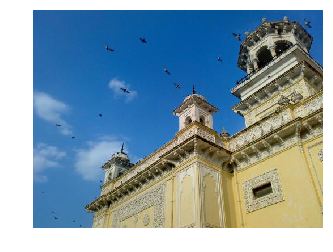

In [6]:
# Read 'home.jpg' picture in RGB.
home = cv2.imread('home.jpg')
home = cv2.cvtColor(home, cv2.COLOR_BGR2RGB)
plt.imshow(home), plt.axis('off')
plt.show()

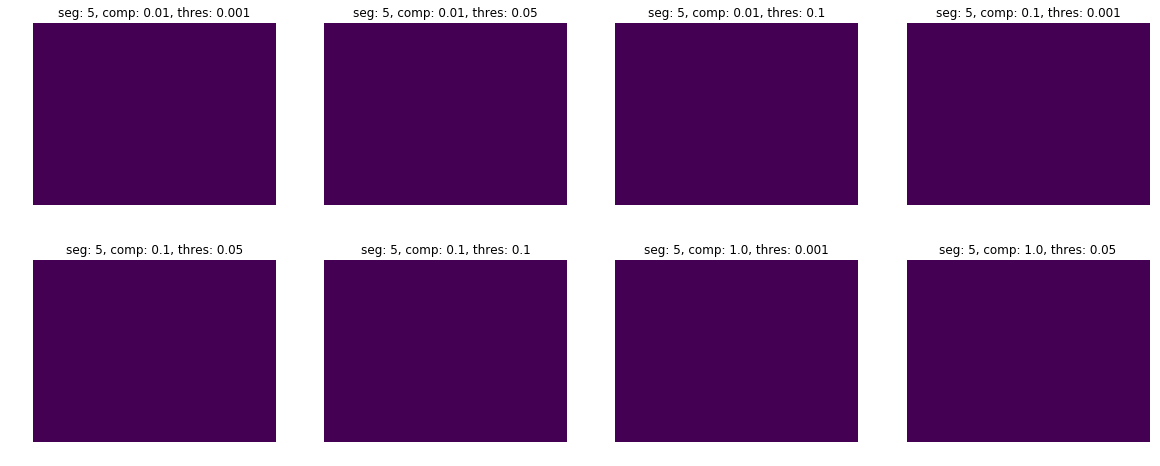

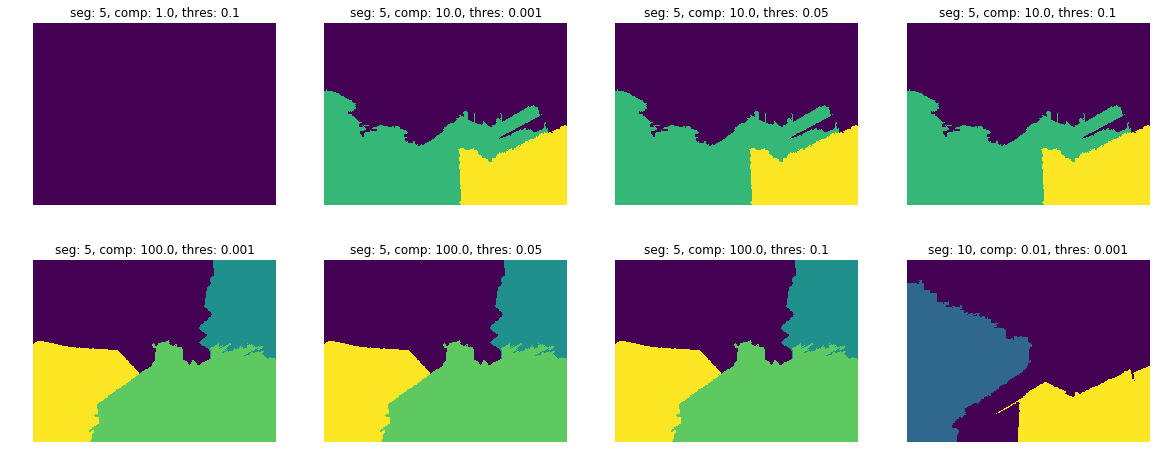

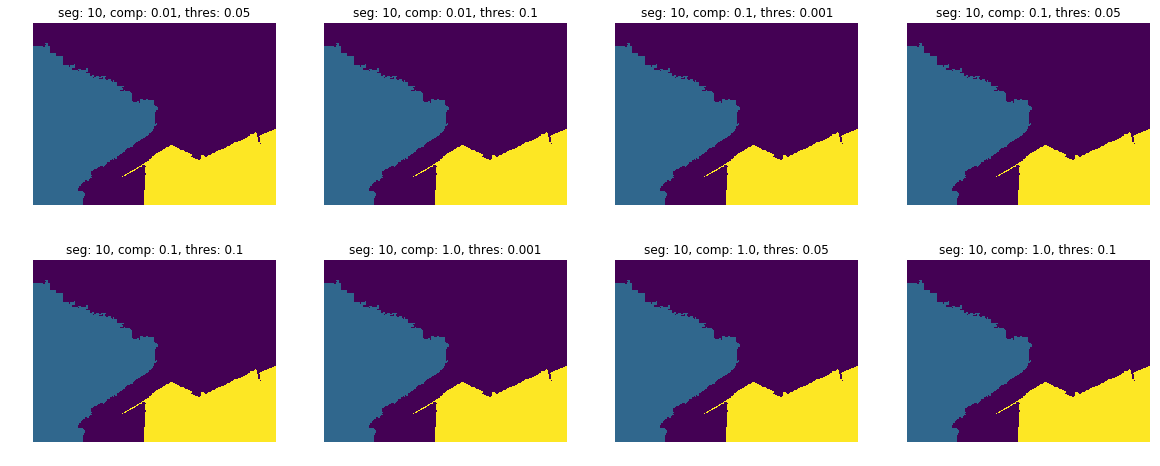

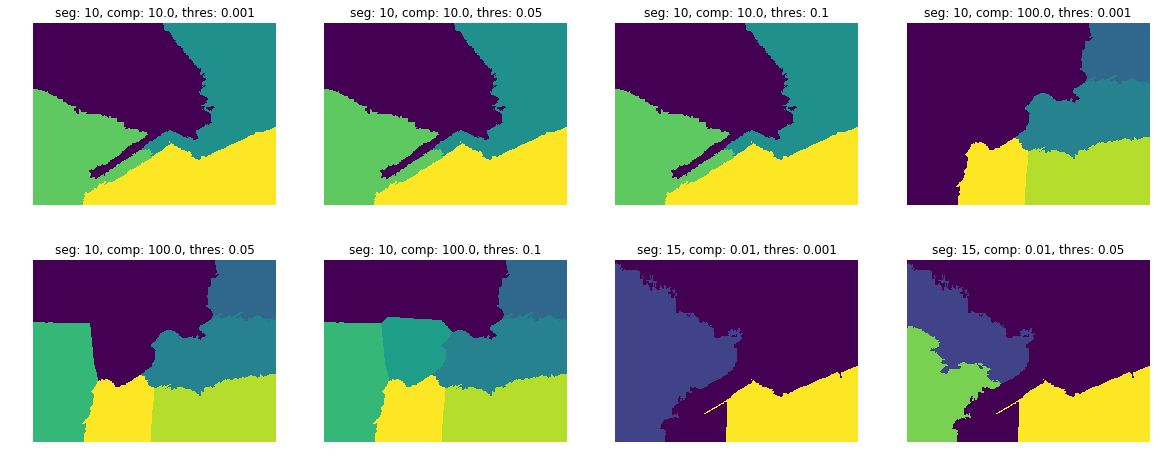

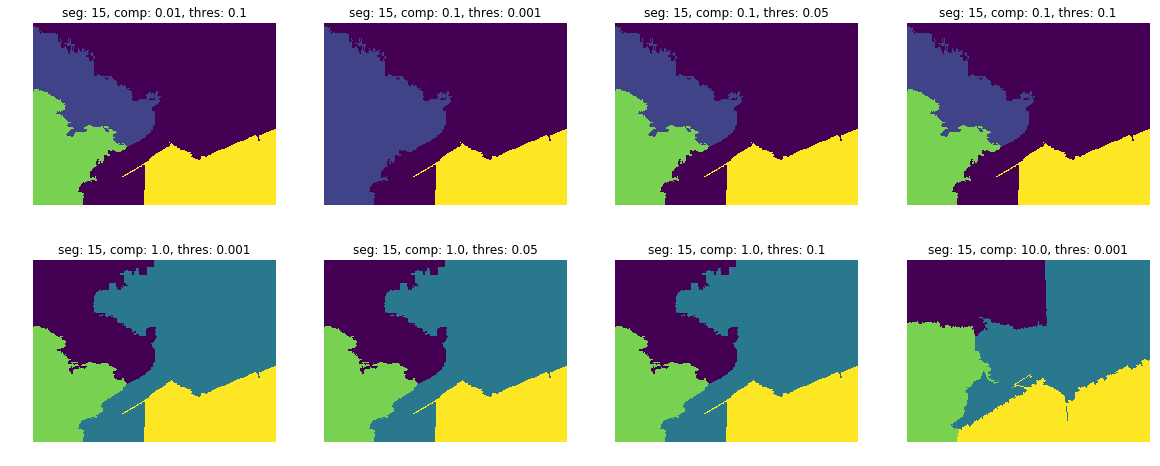

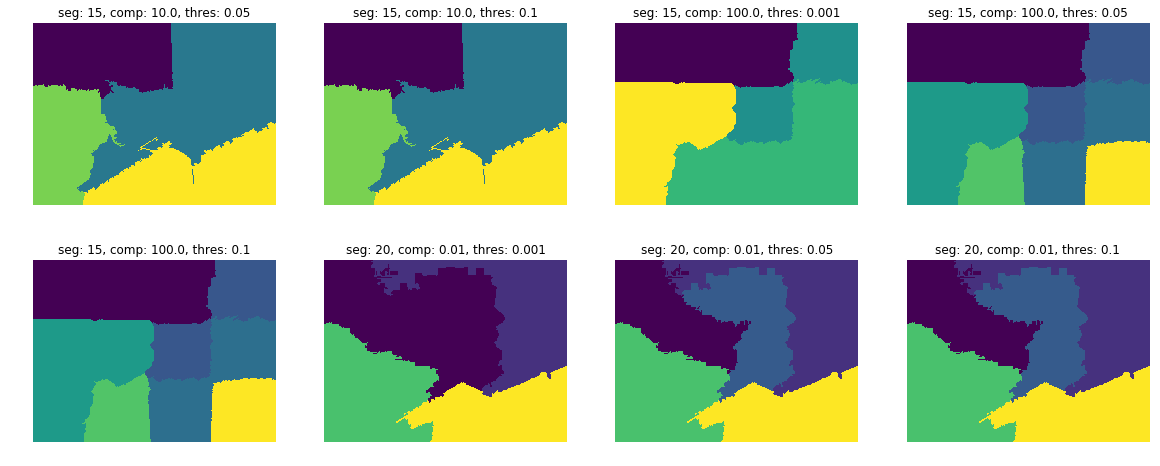

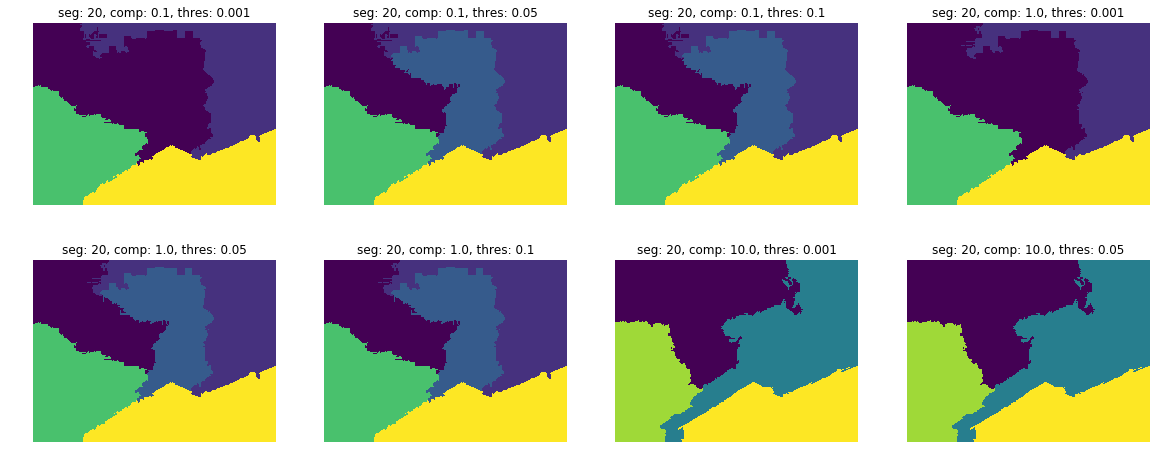

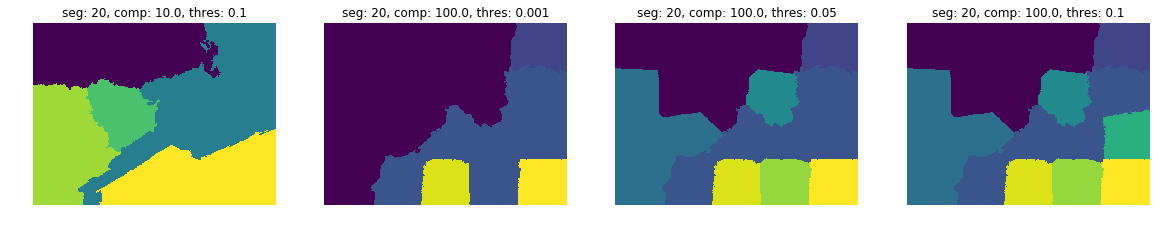

In [7]:
segments = [5, 10, 15, 20]
compactness = [0.01 * 10 ** (i) for i in range(5)] #5
thresholds = [0.001, 0.05, 0.1] #3

pictures = []
title = []

for seg in segments: 
    for comp in compactness: 
        for thres in thresholds: 
            labels = segmentation.slic(home, n_segments=seg, compactness=comp)
            rag = graph.rag_mean_color(home, labels, mode='similarity')
            res = graph.cut_normalized(labels, rag, thres)
            pictures.append(res)
            title.append("seg: {}, comp: {}, thres: {}".format(seg, comp, thres))
plot_figs(pictures, title)

Effect of parameters on the results: 

<ul>
    <li> <b>Compactness </b> </li>
    
This parameter determines the tradeoff of the model between the color similarity and proximity of the clusters. A higher compactness allocates more weight to space proximity, and less weight to color proximity. This means that the superpixels are more cubed. In our results, we can see that at `comp = 0.01`, the segmentation is delimits the shape of the castle better. However, when `comp = 100`, the boundaries are less defined, as the pixels are clustered with their neighbord more, which makes the segmentation more 'bulky'. 
</ul>

<ul>
    <li> <b>n-segmentation</b></li>
This simply defines the number of clusters in the output image.

</ul>

<ul>
    <li> <b>Threshold</b> </li>
This imposes a threshold on the max number of segmentation in a region. The normalization merges similar clusters in a region. The lower the threshold, the more regrouping of adjacent regions. 

</ul>